<a href="https://colab.research.google.com/github/anandpuntambekar/project-guidelines/blob/master/notebook_for_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science

**Connect to google drive**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Copy data from google drive**

In [34]:
%cp drive/My\ Drive/Train.zip .

**Unzip the required files**

In [35]:
!unzip Train.zip

Archive:  Train.zip
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [36]:
!ls

drive  sample_data  Train.csv  Train.zip


**Write your code from here**

## Import Libraries

In [39]:
# Essentials Libraries
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# in the Random Forest method, involves training each decision tree on a different data sample
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Read in the dataset as a dataframe
train = pd.read_csv('Train.csv')
train.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(401125, 53)

#### Each row in the dataset describes the characteristics of a house.
#### Our goal is to predict the SalePrice, given these features.

In [71]:
# Preview the data 
train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Drop Sales ID as it add no value to the training data
train= train.drop(['SalesID'], axis=1)
train.shape

(401125, 52)

## Data Visualization and Cleaning

### Distribution of SalePrice: the value we're trying to predict

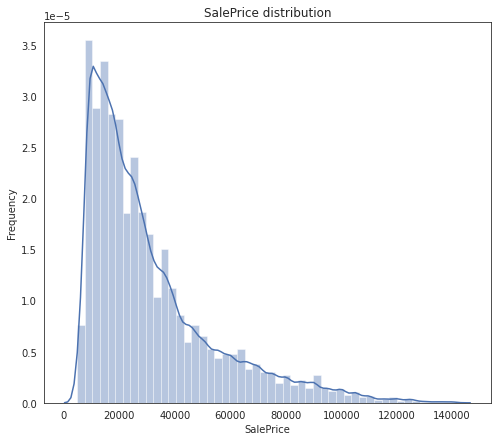

In [73]:
numeric_cols=["SalePrice","YearMade","MachineHoursCurrentMeter"]

f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.show()

### Understandind distribution with Year made

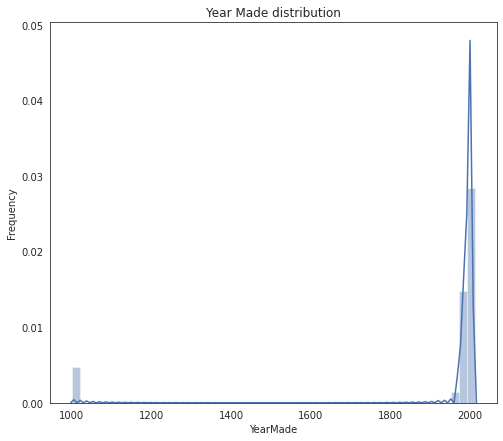

In [74]:
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['YearMade'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="YearMade")
ax.set(title="Year Made distribution")

plt.show()

In [75]:
## As year made cannot be 1000 we substitue the 1000 with Median Years
print(train.shape)
#train= train[train['YearMade'] > train['YearMade'].min()]
train.loc[(train.YearMade ==  train['YearMade'].min()),'YearMade']=train['YearMade'].median()
print(train.shape)
## This way we have avoided the Elimination of Significant Number of Data Points

(401125, 52)
(401125, 52)


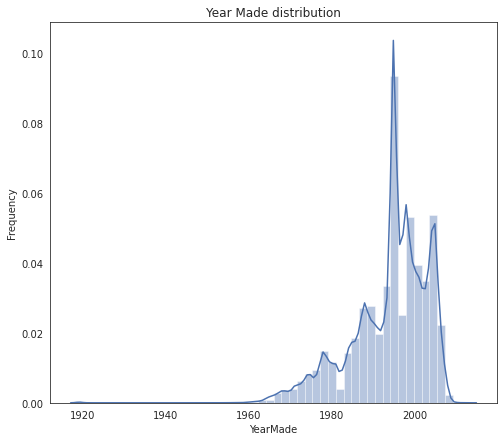

In [76]:
#Taking a look at Year made one More Time after managing Outliers
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['YearMade'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="YearMade")
ax.set(title="Year Made distribution")

plt.show()

Text(0.5, 1.0, 'YearMade')

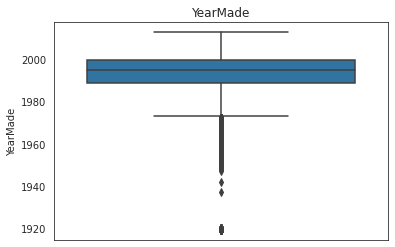

In [77]:
sns.boxplot(y = train['YearMade'])
plt.title('YearMade')


In [78]:
'''
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['MachineHoursCurrentMeter'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="MachineHoursCurrentMeter")
ax.set(title="MachineHoursCurrentMeter distribution")

plt.show()
'''

'\nf, ax = plt.subplots(figsize=(8, 7))\n\nsns.distplot(train[\'MachineHoursCurrentMeter\'], color="b");\nax.xaxis.grid(False)\nax.set(ylabel="Frequency")\nax.set(xlabel="MachineHoursCurrentMeter")\nax.set(title="MachineHoursCurrentMeter distribution")\n\nplt.show()\n'

In [79]:
'''

print(train['MachineHoursCurrentMeter'].min(),train['MachineHoursCurrentMeter'].max(),train['MachineHoursCurrentMeter'].mean())

print(train["MachineHoursCurrentMeter"].median()+train["MachineHoursCurrentMeter"].quantile(0.75))

fence = train["MachineHoursCurrentMeter"].median()+3*(train["MachineHoursCurrentMeter"].quantile(0.75)-train["MachineHoursCurrentMeter"].quantile(0.25))
print (train.shape)
print (train[train["MachineHoursCurrentMeter"]>fence].shape)
print(train['MachineHoursCurrentMeter'].min(),train['MachineHoursCurrentMeter'].max(),train['MachineHoursCurrentMeter'].mean())
print (train.shape)
'''

'\n\nprint(train[\'MachineHoursCurrentMeter\'].min(),train[\'MachineHoursCurrentMeter\'].max(),train[\'MachineHoursCurrentMeter\'].mean())\n\nprint(train["MachineHoursCurrentMeter"].median()+train["MachineHoursCurrentMeter"].quantile(0.75))\n\nfence = train["MachineHoursCurrentMeter"].median()+3*(train["MachineHoursCurrentMeter"].quantile(0.75)-train["MachineHoursCurrentMeter"].quantile(0.25))\nprint (train.shape)\nprint (train[train["MachineHoursCurrentMeter"]>fence].shape)\nprint(train[\'MachineHoursCurrentMeter\'].min(),train[\'MachineHoursCurrentMeter\'].max(),train[\'MachineHoursCurrentMeter\'].mean())\nprint (train.shape)\n'

In [80]:
'''
sns.boxplot(y = train['MachineHoursCurrentMeter'])
plt.title('MachineHoursCurrentMeter')
'''

"\nsns.boxplot(y = train['MachineHoursCurrentMeter'])\nplt.title('MachineHoursCurrentMeter')\n"

### Visualizing all Numerical values

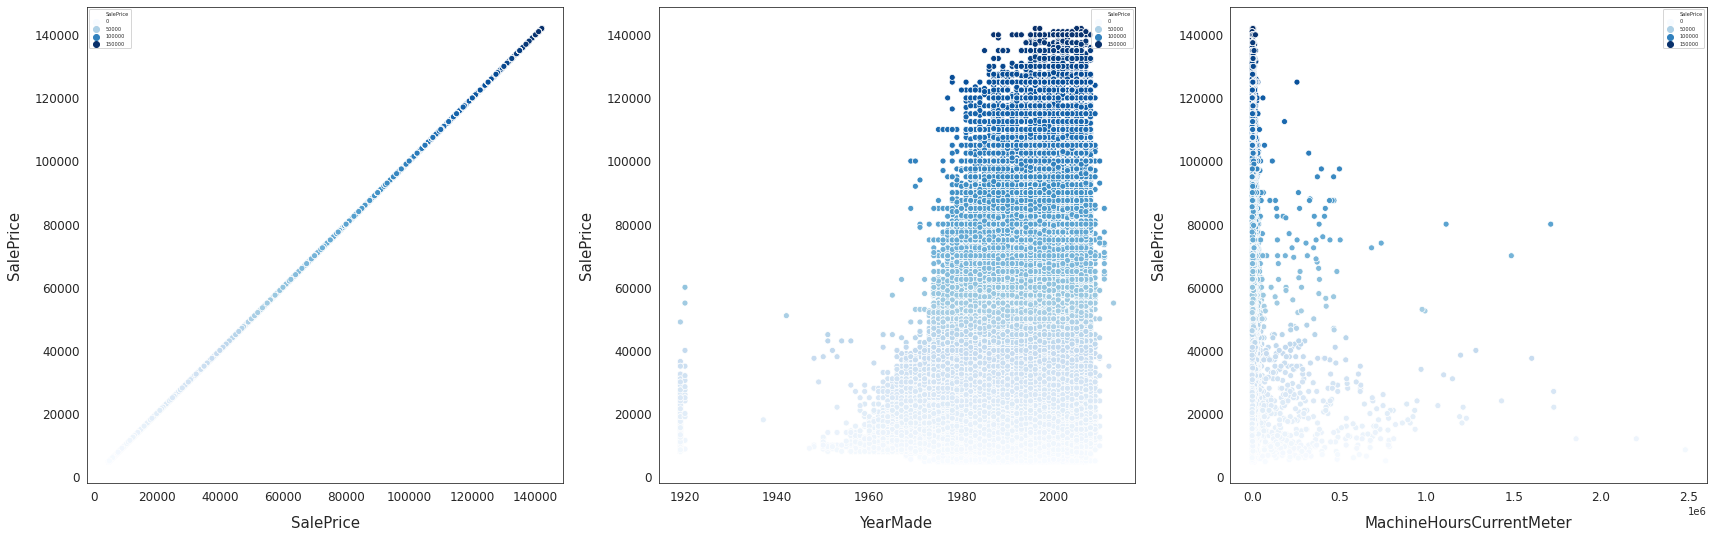

In [81]:

numeric=["SalePrice","YearMade","MachineHoursCurrentMeter"]

# visualising some more outliers in the data values

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 5})
        
plt.show()

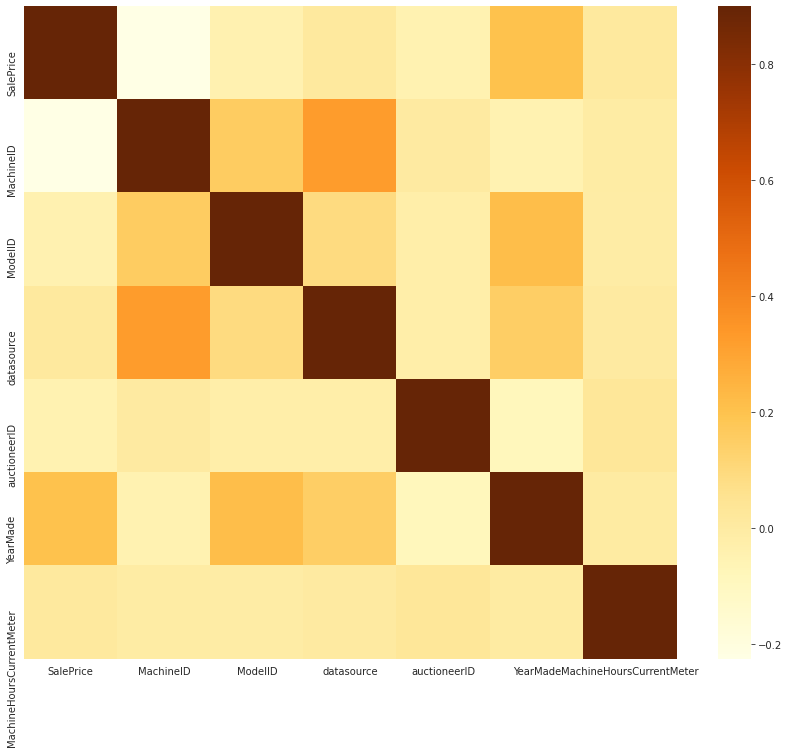

In [82]:
## Lets look at the Corelation among Features to See Interesting Relations

corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="YlOrBr", square=True)

## Let's plot how SalePrice relates to some of the features in the dataset

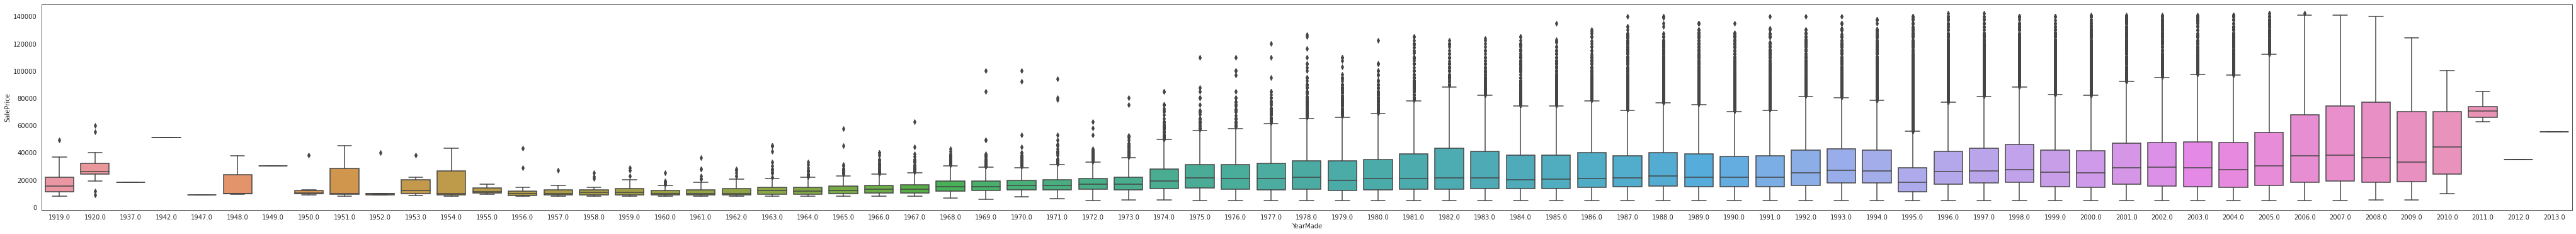

In [83]:
data = pd.concat([train['SalePrice'], train['YearMade']], axis=1)
f, ax = plt.subplots(figsize=(72, 6))
fig = sns.boxplot(x=train['YearMade'], y="SalePrice", data=data)

## Over the years Price has tended to increase with year made

In [84]:
#data = pd.concat([train['SalePrice'], train['ModelID']], axis=1)
#f, ax = plt.subplots(figsize=(72, 6))
#fig = sns.boxplot(x=train['ModelID'], y="SalePrice", data=data)

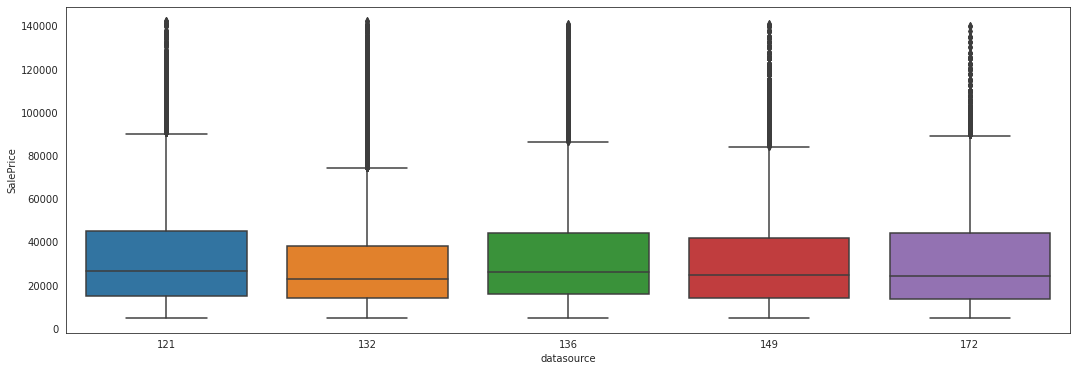

In [85]:

data = pd.concat([train['SalePrice'], train['datasource']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=train['datasource'], y="SalePrice", data=data)

### Data Source Does not appear to have a defining Impact 

### Addressing Missing Values 

In [86]:
#find percentage  of NaN values

perc_na = (train.isnull().sum()/len(train))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage' :ratio_na})
missing_data


,Missing Percentage
Tip_Control,93.712932
Blade_Extension,93.712932
Blade_Width,93.712932
Enclosure_Type,93.712932
Engine_Horsepower,93.712932
Pushblock,93.712932
Scarifier,93.710190
Hydraulics_Flow,89.189903
Grouser_Tracks,89.189903
Coupler_System,89.165971


In [87]:
# Apply per-column median of that columns and fill with that value for Numerical Variables

numeric_cols=["SalePrice","YearMade","MachineHoursCurrentMeter"]

train[numeric_cols] = train[numeric_cols].apply(lambda x: x.fillna(x.median()),axis=0)


In [88]:
# Apply per-column Highest Frequency value to address Missing variables
# Convert Non numerical columns to string

for c_cols in train.columns.tolist():
  if c_cols not in ["SalePrice","YearMade","MachineHoursCurrentMeter","saledate"]:
    #print(c_cols)
    
    #train[c_cols] = train[c_cols].cat.add_categories('Unknown')
    train=train.fillna(train[c_cols].value_counts().index[0])
    
    train[c_cols]=train[c_cols].astype(str)

In [89]:
perc_na = (train.isnull().sum()/len(train))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage' :ratio_na})
missing_data


,Missing Percentage
Steering_Controls,0.0
Differential_Type,0.0
Ride_Control,0.0
Pad_Type,0.0
Forks,0.0
Enclosure,0.0
Drive_System,0.0
ProductGroupDesc,0.0
ProductGroup,0.0
state,0.0


## Feature Engineering

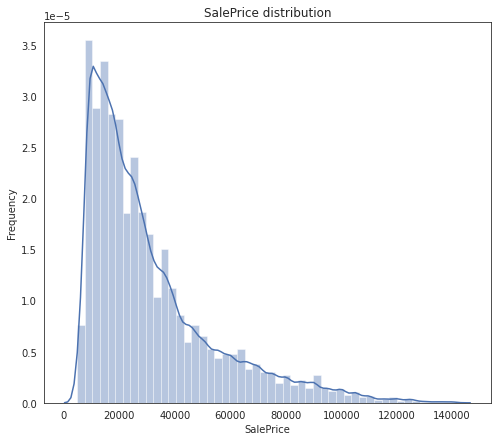

In [90]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.show()

In [91]:
# Takes take the log of Sale price in order to reduce Skewness of the Distribution
# log(1+x) transform
train["SalePrice"] = np.log1p(train["SalePrice"])

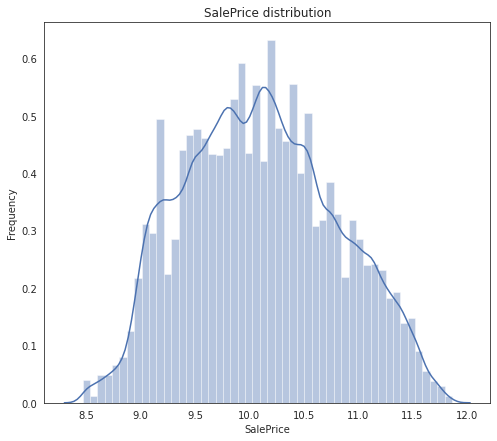

In [92]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.show()

## Adding information Such as Day of Year, Month, Year and Other Information which can be Learnt with Sale Date

In [93]:
#!pip  install scikit-learn==0.19.1
#!pip install fastai==0.7.0
from fastai.structured import add_datepart
add_datepart(train, 'saledate')

In [94]:
train.columns.tolist()

['SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs

In [29]:
'''
print(train.shape)
df_in=train

q1 = df_in["MachineHoursCurrentMeter"].quantile(0.25)
q3 = df_in["MachineHoursCurrentMeter"].quantile(0.75)
iqr = q3-q1 #Interquartile range

fence_low  = q1-1.75*iqr
fence_high = q3+2*iqr


df_out = df_in.loc[(df_in["MachineHoursCurrentMeter"] < fence_high)]
print(df_out.shape)
'''

'\nprint(train.shape)\ndf_in=train\n\nq1 = df_in["MachineHoursCurrentMeter"].quantile(0.25)\nq3 = df_in["MachineHoursCurrentMeter"].quantile(0.75)\niqr = q3-q1 #Interquartile range\n\nfence_low  = q1-1.75*iqr\nfence_high = q3+2*iqr\n\n\ndf_out = df_in.loc[(df_in["MachineHoursCurrentMeter"] < fence_high)]\nprint(df_out.shape)\n'

In [30]:
#!pip  install scikit-learn==0.19.1
#!pip install fastai==0.7.0


In [95]:
  train.head()

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,11.097425,999089,3157,121,3.0,2004.0,68.0,Low,521D,521,D,2283592,2283592,2283592,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,2283592,EROPS w AC,None or Unspecified,2283592,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2 Valve,2283592,2283592,2283592,2283592,None or Unspecified,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,10.950824,117657,77,121,3.0,1996.0,4640.0,Low,950FII,950,F,II,2283592,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,2283592,EROPS w AC,None or Unspecified,2283592,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2 Valve,2283592,2283592,2283592,2283592,23.5,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,9.210440,434808,7009,121,3.0,2001.0,2838.0,High,226,226,2283592,2283592,2283592,2283592,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,2283592,OROPS,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,Auxiliary,2283592,2283592,2283592,2283592,2283592,None or Unspecified,None or Unspecified,None or Unspecified,Standard,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,10.558439,1026470,332,121,3.0,2001.0,3486.0,High,PC120-6E,PC120,2283592,-6E,2283592,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,2283592,EROPS w AC,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2 Valve,2283592,2283592,2283592,2283592,2283592,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,9.305741,1057373,17311,121,3.0,2007.0,722.0,Medium,S175,S175,2283592,2283592,2283592,2283592,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,2283592,EROPS,None or Unspecified,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,Auxiliary,2283592,2283592,2283592,2283592,2283592,None or Unspecified,None or Unspecified,None or Unspecified,Standard,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2283592,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


## Let us find Cardinality of all Categorical Variables



In [96]:
for c_cols in train.columns.tolist():
  if c_cols not in ["SalePrice","YearMade","MachineHoursCurrentMeter"]:
    print(c_cols, train[c_cols].nunique() )


MachineID 341027
ModelID 5218
datasource 5
auctioneerID 31
UsageBand 4
fiModelDesc 4999
fiBaseModel 1950
fiSecondaryDesc 176
fiModelSeries 129
fiModelDescriptor 140
ProductSize 7
fiProductClassDesc 74
state 53
ProductGroup 6
ProductGroupDesc 6
Drive_System 5
Enclosure 7
Forks 3
Pad_Type 5
Ride_Control 4
Stick 3
Transmission 9
Turbocharged 3
Blade_Extension 3
Blade_Width 7
Enclosure_Type 4
Engine_Horsepower 3
Hydraulics 13
Pushblock 3
Ripper 5
Scarifier 3
Tip_Control 4
Tire_Size 18
Coupler 4
Coupler_System 3
Grouser_Tracks 3
Hydraulics_Flow 4
Track_Type 3
Undercarriage_Pad_Width 20
Stick_Length 30
Thumb 4
Pattern_Changer 4
Grouser_Type 4
Backhoe_Mounting 3
Blade_Type 11
Travel_Controls 8
Differential_Type 5
Steering_Controls 6
saleYear 23
saleMonth 12
saleWeek 53
saleDay 31
saleDayofweek 7
saleDayofyear 360
saleIs_month_end 2
saleIs_month_start 2
saleIs_quarter_end 2
saleIs_quarter_start 2
saleIs_year_end 2
saleIs_year_start 1
saleElapsed 3919


## The following Columns have very high level of Cardinality and Hence I elminiate the same
- MachineID 341027
- ModelID 5218
- fiModelDesc 4999
- fiBaseModel 1950
- fiSecondaryDesc 176
- fiModelSeries 129
- fiModelDescriptor 140

In [97]:
train= train.drop(['MachineID',
'ModelID',
'fiModelDesc',
'fiBaseModel',
'fiSecondaryDesc',
'fiModelSeries',
'fiModelDescriptor'], axis=1)

## The Following Columns have more than 80% values missig and hence I eliminate the same

- Tip_Control	93.712932
- Blade_Extension	93.712932
- Blade_Width	93.712932
- Enclosure_Type	93.712932
- Engine_Horsepower	93.712932
- Pushblock	93.712932
- Scarifier	93.710190
- Hydraulics_Flow	89.189903
- Grouser_Tracks	89.189903
- Coupler_System	89.165971
- fiModelSeries	85.812901
- Steering_Controls	82.706388
- Differential_Type	82.695918
- UsageBand	82.639078
- fiModelDescriptor	82.070676
- Backhoe_Mounting	80.387161
- Pad_Type	80.271985
- Stick	80.271985
- Turbocharged	80.271985
- Blade_Type	80.097725
- Travel_Controls	80.097476

In [98]:
train= train.drop([
'Tip_Control',
'Blade_Extension',
'Blade_Width',
'Enclosure_Type',
'Engine_Horsepower',
'Pushblock',
'Scarifier',
'Hydraulics_Flow',
'Grouser_Tracks',
'Coupler_System',
#'fiModelSeries',
'Steering_Controls',
'Differential_Type',
'UsageBand',
#'fiModelDescriptor',
'Backhoe_Mounting',
'Pad_Type',
'Stick',
'Turbocharged',
'Blade_Type',
'Travel_Controls',

], axis=1)

## Encode Categorical Features

In [107]:
print(train.shape)
df_train=pd.get_dummies(train)
print(df_train.shape)

(401125, 38)
(401125, 331)


In [108]:
df_train.head()

,SalePrice,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,datasource_121,datasource_132,datasource_136,datasource_149,datasource_172,auctioneerID_0.0,auctioneerID_1.0,auctioneerID_10.0,auctioneerID_11.0,auctioneerID_12.0,auctioneerID_13.0,auctioneerID_14.0,auctioneerID_15.0,auctioneerID_16.0,auctioneerID_17.0,auctioneerID_18.0,auctioneerID_19.0,auctioneerID_2.0,auctioneerID_20.0,auctioneerID_21.0,auctioneerID_22.0,auctioneerID_2283592.0,auctioneerID_23.0,auctioneerID_24.0,...,"Stick_Length_10' 6""","Stick_Length_11' 0""","Stick_Length_11' 10""","Stick_Length_12' 10""","Stick_Length_12' 4""","Stick_Length_12' 8""","Stick_Length_13' 10""","Stick_Length_13' 7""","Stick_Length_13' 9""","Stick_Length_14' 1""","Stick_Length_15' 4""","Stick_Length_15' 9""","Stick_Length_19' 8""",Stick_Length_2283592,"Stick_Length_24' 3""","Stick_Length_6' 3""","Stick_Length_7' 10""","Stick_Length_8' 10""","Stick_Length_8' 2""","Stick_Length_8' 4""","Stick_Length_8' 6""","Stick_Length_9' 10""","Stick_Length_9' 2""","Stick_Length_9' 5""","Stick_Length_9' 6""","Stick_Length_9' 7""","Stick_Length_9' 8""",Stick_Length_None or Unspecified,Thumb_2283592,Thumb_Hydraulic,Thumb_Manual,Thumb_None or Unspecified,Pattern_Changer_2283592,Pattern_Changer_No,Pattern_Changer_None or Unspecified,Pattern_Changer_Yes,Grouser_Type_2283592,Grouser_Type_Double,Grouser_Type_Single,Grouser_Type_Triple
0,11.097425,2004.0,68.0,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,10.950824,1996.0,4640.0,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,9.210440,2001.0,2838.0,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,10.558439,2001.0,3486.0,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,9.305741,2007.0,722.0,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


## Train a model


In [109]:
print(df_train.shape)

target1=df_train['SalePrice']

df_train= df_train.drop(['SalePrice'], axis=1)
df_train.shape

(401125, 331)


(401125, 330)

In [110]:
X_train, X_test, y_train, y_test =train_test_split(df_train, target1)

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
#  k-fold CV, the training set is split into k smaller sets 
from sklearn.cross_validation import cross_val_score

scorer = make_scorer(mean_squared_error, False)

#clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf = RandomForestRegressor( n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15, scoring = scorer))

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

In [17]:
numeric_cols=["SalePrice","YearMade","MachineHoursCurrentMeter"]

['SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

# Coding

#### 1. Given a string of chars a-z, reduce the string to its shortest length by doing following operation. 

#### If a pair of adjacent letters match, deletes them. 
#### Ex. For instance, the string 'aab' could be reduced to 'b' in one operation. For the string 'aaabccddd' the reduced string is abd

#### Print thhe reduced string as output. If the final string is empty, print Empty String

#### 2. Find an element of the array such that the sum of all elements to the left is equal to the sum of all elements to the right. If such an element exits print YES else print NO.

#### Ex. Given the array, arr = [5, 6, 8, 11], 8 is between two subarrays that sum to 11. If the array length is 1, it satisfies the rule as left and right sum to 0.